In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 10
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_sine'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

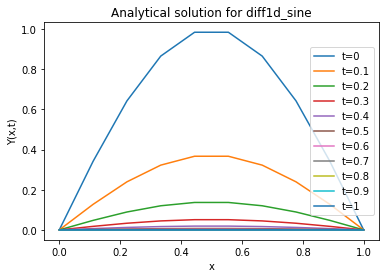

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## Nelder-Mead (adaptive)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

2min 1s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.02532556, -3.39327629, -0.23323056, ...,  0.45310347,
         4.40266847,  1.64108341],
       [ 0.03784187, -3.36531773, -0.25897935, ...,  0.46541767,
         4.30068713,  1.63599115],
       [ 0.04121959, -3.32387685, -0.24418547, ...,  0.44691273,
         4.27236836,  1.60638579],
       ...,
       [ 0.03795389, -3.32910085, -0.26011597, ...,  0.45910085,
         4.08172616,  1.62429033],
       [ 0.03981814, -3.36588507, -0.29258323, ...,  0.46432219,
         4.26972996,  1.6302339 ],
       [ 0.02823062, -3.31203946, -0.24365   , ...,  0.46453131,
         4.28091587,  1.64117887]]), array([127.19274583, 128.75568739, 129.06278681, 129.8578228 ,
       130.71607605, 130.741877  , 130.74976025, 131.35194291,
       131.50628529, 131.51553323, 131.56234006, 132.02477735,
       132.22613997, 132.55937472, 132.72168208, 132.78769627,
       132.87368176, 132.89451299, 132.9610016 , 133

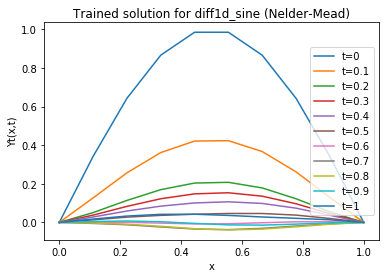

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

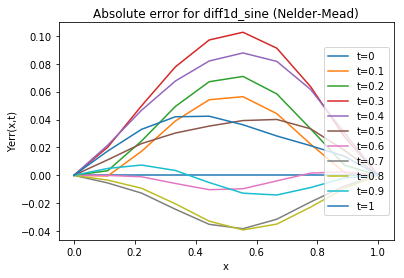

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

## Nelder-Mead (adaptive, maxfev=16000)

In [9]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
options['maxfev'] = 16000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

4min 9s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ 0.10501705, -2.37192207, -1.72937243, ...,  2.04696419,
        13.01963626,  3.06539149],
       [ 0.11257953, -2.37726538, -1.7339371 , ...,  2.04813991,
        13.10441282,  3.0510131 ],
       [ 0.10622555, -2.36470673, -1.74011245, ...,  2.0444898 ,
        13.05369418,  3.05807572],
       ...,
       [ 0.11613881, -2.3846918 , -1.73439552, ...,  2.01866954,
        12.88734477,  3.02501005],
       [ 0.11529433, -2.38649125, -1.7455336 , ...,  2.03229684,
        12.98745645,  3.0116404 ],
       [ 0.12077315, -2.37764355, -1.76097779, ...,  2.0438208 ,
        12.96621889,  3.00529174]]), array([32.9823063 , 33.05071403, 33.05369289, 33.08767903, 33.09344093,
       33.09587207, 33.10843623, 33.11823723, 33.1220646 , 33.14159926,
       33.1912069 , 33.19937703, 33.20978474, 33.22350395, 33.23683731,
       33.24791567, 33.25312883, 33.25349653, 33.26290595, 33.29808311,
       33.301984

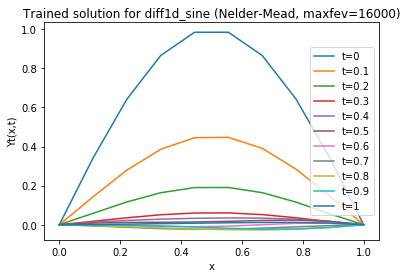

In [10]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

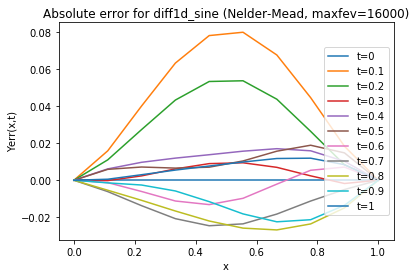

In [11]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (adaptive, maxfev=32000)

In [12]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
options['maxfev'] = 32000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

8min 13s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[-1.3718986 , -2.37066711, -0.43471087, ...,  1.50702413,
        19.97019307,  5.4290742 ],
       [-1.37781489, -2.36712749, -0.4418589 , ...,  1.49517282,
        19.99997651,  5.41903764],
       [-1.37243109, -2.3663679 , -0.43996995, ...,  1.50608004,
        19.9793215 ,  5.43677739],
       ...,
       [-1.37598293, -2.36537743, -0.43582825, ...,  1.50368245,
        19.99323083,  5.43849877],
       [-1.37779216, -2.36834021, -0.43632296, ...,  1.50720966,
        20.03602051,  5.45028646],
       [-1.37706057, -2.36561712, -0.45239649, ...,  1.50625422,
        19.99369723,  5.4407633 ]]), array([8.82579764, 8.82760292, 8.82838869, 8.82844425, 8.82952954,
       8.82993682, 8.8301605 , 8.83074008, 8.83130539, 8.8322832 ,
       8.83295775, 8.83364898, 8.83438495, 8.83443386, 8.83465173,
       8.83565018, 8.83589567, 8.83610075, 8.8364276 , 8.83707463,
       8.83745163, 8.83754531, 8.83

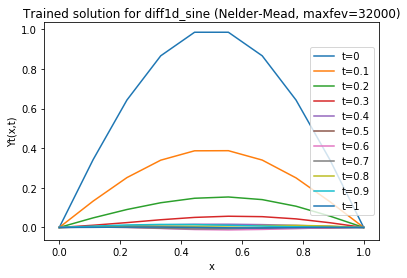

In [13]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

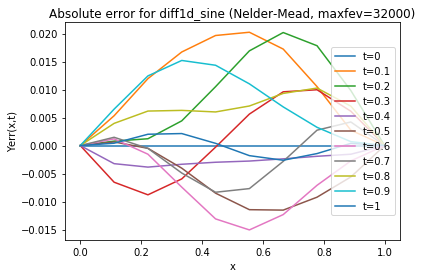

In [14]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (adaptive, maxfev=64000)

In [15]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
options['maxfev'] = 64000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

16min 27s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[-1.42819009, -2.74286944,  3.15560539, ...,  5.13332552,
        17.52864835, 14.54376116],
       [-1.42938061, -2.74767651,  3.16943393, ...,  5.13971035,
        17.53900539, 14.56055912],
       [-1.42972413, -2.74471651,  3.14880052, ...,  5.13127232,
        17.53190581, 14.53525796],
       ...,
       [-1.42682436, -2.74369282,  3.14518526, ...,  5.12451727,
        17.47484591, 14.52167678],
       [-1.42865637, -2.74393739,  3.14002601, ...,  5.12727222,
        17.48405511, 14.54161747],
       [-1.42938009, -2.74934546,  3.16084431, ...,  5.13020187,
        17.5363558 , 14.53162164]]), array([2.73970357, 2.74017598, 2.74024108, 2.74036075, 2.74088934,
       2.74126126, 2.74136296, 2.74196414, 2.74203887, 2.74220313,
       2.74255917, 2.74257729, 2.74268357, 2.74292982, 2.74316597,
       2.74327613, 2.74364765, 2.74365219, 2.74389558, 2.74424309,
       2.74428387, 2.74431181, 2.7

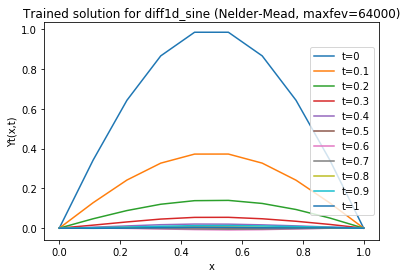

In [16]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

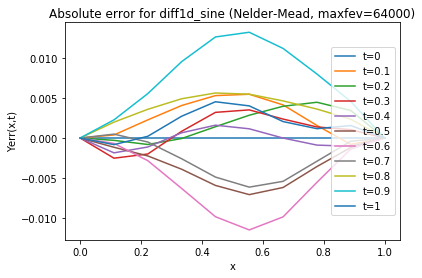

In [17]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (adaptive, maxfev=128000)

In [18]:
net5 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
options['maxfev'] = 128000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net5.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net5.res)

32min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[-0.40593405, -2.07067552,  2.67002103, ...,  4.69544873,
        36.39885766, 42.55232713],
       [-0.40851947, -2.07033711,  2.67109091, ...,  4.69340463,
        36.37369062, 42.4379749 ],
       [-0.40769544, -2.06939151,  2.66836946, ...,  4.69328627,
        36.38570908, 42.47412064],
       ...,
       [-0.41011569, -2.06956866,  2.66723038, ...,  4.69498873,
        36.41657408, 42.51482458],
       [-0.40647227, -2.07036471,  2.66660092, ...,  4.68862764,
        36.36927105, 42.50204735],
       [-0.40968091, -2.06995548,  2.66809143, ...,  4.70484791,
        36.4656643 , 42.59033979]]), array([1.28019301, 1.28022252, 1.28025278, 1.28026974, 1.2802778 ,
       1.28030972, 1.2803224 , 1.28033769, 1.28035255, 1.28035533,
       1.28036557, 1.28036621, 1.28036653, 1.28037587, 1.28037897,
       1.28039703, 1.28040094, 1.28041022, 1.28041907, 1.28041933,
       1.28042301, 1.28043191, 1.2

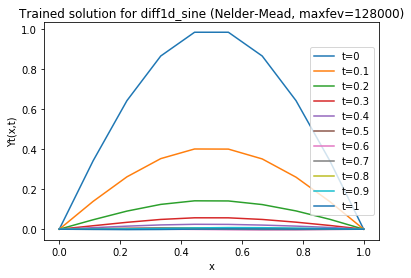

In [19]:
Yt5 = net5.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

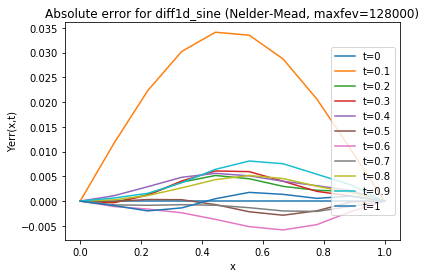

In [20]:
Y_err5 = Yt5 - Ya
for i in range(nt):
    plt.plot(xt, Y_err5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (adaptive, maxfev=256000, xtol=ftol=1e-6)

In [22]:
net6 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['adaptive'] = True
options['disp'] = True
options['ftol'] = 1e-6
options['maxfev'] = 256000
options['xtol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net6.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net6.res)

1h 4min 41s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[ -0.71599608,  -2.44437991,   2.04180173, ...,   0.61154503,
        160.30971715,  66.55359554],
       [ -0.71534904,  -2.44484788,   2.04336598, ...,   0.61153395,
        160.31200676,  66.53317335],
       [ -0.71669367,  -2.44458778,   2.04206897, ...,   0.61111021,
        160.29845297,  66.54222207],
       ...,
       [ -0.71621346,  -2.44458378,   2.04462737, ...,   0.61164971,
        160.30682487,  66.53082816],
       [ -0.7165368 ,  -2.44450139,   2.04231121, ...,   0.61104459,
        160.27431466,  66.52363228],
       [ -0.7166116 ,  -2.44428097,   2.04242027, ...,   0.610826  ,
        160.30665211,  66.544377  ]]), array([0.36358271, 0.36358359, 0.36358466, 0.36358477, 0.36358576,
       0.36358591, 0.36358621, 0.36358639, 0.36358671, 0.36358743,
       0.36358809, 0.36358822, 0.36358927, 0.36358951, 0.36358978,
       0.36359001, 0.36359028, 0.36359154, 0.36359193, 0.363591

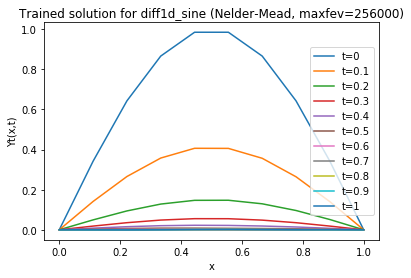

In [23]:
Yt6 = net6.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt6[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

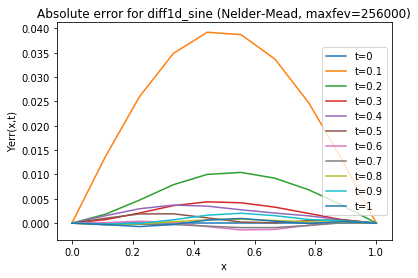

In [24]:
Y_err6 = Yt6 - Ya
for i in range(nt):
    plt.plot(xt, Y_err6[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));